In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import sys
sys.path.insert(0, '../')
from cleaning.clean_utils import preprocess_data, clean_df, fillna_all
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
dfs = []

for i in range(1, 45):
    url = f"../data/people/people_{i}0.json"
    with open(url, 'r') as f:
        data = json.load(f)
        dfs.append(pd.read_json(json.dumps(data)))

df_original = pd.concat(dfs)

In [132]:
df_original.head()

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,NaN,1816,politician,Male,NaN,NaN,NaN,NaN,NaN,NaN
1,Adolfh Freiherr Knigge,16,10.0,1752,05:30,Libra,6.0,11.0,12,NaN,...,NaN,1796,writer,Male,1.0,NaN,NaN,NaN,NaN,NaN
2,George Rogers Clark,19,11.0,1752,None,Sagittarius,1.0,30.0,,NaN,...,NaN,1818,general,Male,NaN,1.0,NaN,NaN,NaN,NaN
3,Thomas Chatterton,20,11.0,1752,06:14,Sagittarius,2.0,21.0,1,NaN,...,NaN,1770,"writer, poet",Male,NaN,1.0,NaN,NaN,NaN,NaN
4,Solomon Drowne,11,3.0,1753,08:00,Pisces,12.0,55.0,11,NaN,...,NaN,1834,doctor,Male,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning - using clean_utils.py

In [133]:
df = preprocess_data(df_original)
df.head()

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,NaN,1816,politician,Male,NaN,NaN,NaN,NaN,NaN,NaN
1,Adolfh Freiherr Knigge,16,10.0,1752,05:30,Libra,6.0,11.0,12,NaN,...,NaN,1796,writer,Male,1.0,NaN,NaN,NaN,NaN,NaN
3,Thomas Chatterton,20,11.0,1752,06:14,Sagittarius,2.0,21.0,1,NaN,...,NaN,1770,"writer, poet",Male,NaN,1.0,NaN,NaN,NaN,NaN
4,Solomon Drowne,11,3.0,1753,08:00,Pisces,12.0,55.0,11,NaN,...,NaN,1834,doctor,Male,NaN,NaN,NaN,NaN,NaN,NaN
6,Franz Carl Achard,28,4.0,1753,14:00,Taurus,19.0,31.0,9,1.0,...,NaN,1821,chemist,Male,NaN,NaN,1.0,1.0,NaN,NaN


In [134]:
df.dtypes.value_counts()

object     42
int64      30
float64    23
dtype: int64

In [135]:
df = fillna_all(df)
df

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,death_month,death_year,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,0.0,1816,politician,Male,,0.0,,0.0,0.0,0.0
1,Adolfh Freiherr Knigge,16,10.0,1752,05:30,Libra,6.0,11.0,12,,...,0.0,1796,writer,Male,1.0,0.0,,0.0,0.0,0.0
3,Thomas Chatterton,20,11.0,1752,06:14,Sagittarius,2.0,21.0,1,,...,0.0,1770,"writer, poet",Male,,1.0,,0.0,0.0,0.0
4,Solomon Drowne,11,3.0,1753,08:00,Pisces,12.0,55.0,11,,...,0.0,1834,doctor,Male,,0.0,,0.0,0.0,0.0
6,Franz Carl Achard,28,4.0,1753,14:00,Taurus,19.0,31.0,9,1.0,...,0.0,1821,chemist,Male,,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,Gilles Simon,27,12.0,1984,09:00,Sagittarius,15.0,1.0,11,,...,0.0,,tennis player,Male,,0.0,,0.0,0.0,0.0
1970,Sean Stone,29,12.0,1984,16:00,Sagittarius,16.0,22.0,6,,...,0.0,,actor,Male,,0.0,,0.0,0.0,0.0
1972,LeBron James,30,12.0,1984,16:04,Sagittarius,17.0,4.0,6,,...,0.0,,basketball player,Male,,0.0,,0.0,0.0,0.0
1974,Kady Zadora Riklis,1,1.0,1985,02:03,Sagittarius,18.0,13.0,2,,...,0.0,,,Female,,0.0,,0.0,0.0,0.0


In [136]:
df.dtypes.value_counts()

object     42
int64      30
float64    23
dtype: int64

In [137]:
columns_to_delete=['death_day', 'death_month', 'death_year']
df.drop(columns=columns_to_delete, inplace=True)
df.head()

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,house_12_pos_minutes,death_cause,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1.0,1752,01:44,Aquarius,2.0,51.0,3,1.0,...,17,,politician,Male,,0.0,,0.0,0.0,0.0
1,Adolfh Freiherr Knigge,16,10.0,1752,05:30,Libra,6.0,11.0,12,,...,14,,writer,Male,1.0,0.0,,0.0,0.0,0.0
3,Thomas Chatterton,20,11.0,1752,06:14,Sagittarius,2.0,21.0,1,,...,25,Suicide by Poisoning,"writer, poet",Male,,1.0,,0.0,0.0,0.0
4,Solomon Drowne,11,3.0,1753,08:00,Pisces,12.0,55.0,11,,...,30,,doctor,Male,,0.0,,0.0,0.0,0.0
6,Franz Carl Achard,28,4.0,1753,14:00,Taurus,19.0,31.0,9,1.0,...,16,,chemist,Male,,0.0,1.0,1.0,0.0,0.0


In [138]:
damn_retrogrades = df.filter(like='retrograde').columns
damn_retrogrades 

# list before cleaning

Index(['mercury_retrograde', 'neptune_retrograde', 'uranus_retrograde',
       'jupiter_retrograde', 'pluto_retrograde', 'saturn_retrograde',
       'venus_retrograde', 'mars_retrograde'],
      dtype='object')

In [139]:
df.mercury_retrograde.value_counts()

       17102
1.0     3802
Name: mercury_retrograde, dtype: int64

In [140]:
df.neptune_retrograde.value_counts()

       11839
1.0     9065
Name: neptune_retrograde, dtype: int64

In [141]:
df.uranus_retrograde.value_counts()

       12388
1.0     8516
Name: uranus_retrograde, dtype: int64

In [142]:
df.jupiter_retrograde.value_counts()

0.0    14688
1.0     6216
Name: jupiter_retrograde, dtype: int64

In [143]:
df.pluto_retrograde.value_counts()

       11738
1.0     9166
Name: pluto_retrograde, dtype: int64

In [144]:
df.saturn_retrograde.value_counts()

0.0    13407
1.0     7497
Name: saturn_retrograde, dtype: int64

In [145]:
df.venus_retrograde.value_counts()

0.0    19417
1.0     1487
Name: venus_retrograde, dtype: int64

In [146]:
df.mars_retrograde.value_counts()

0.0    18998
1.0     1906
Name: mars_retrograde, dtype: int64

In [147]:
df_clean = clean_df(df)
df_clean

,name,birth_day,birth_month,birth_year,birth_time,mercury_sign,mercury_pos_degrees,mercury_pos_minutes,mercury_house,mercury_retrograde,...,house_12_pos_minutes,death_cause,occupation,gender,uranus_retrograde,jupiter_retrograde,pluto_retrograde,saturn_retrograde,venus_retrograde,mars_retrograde
0,Gouverneur Morris,30,1,1752,01:44,Aquarius,2,51.0,3,1,...,17.0,,politician,Male,0,0,0,0,0,0
1,Adolfh Freiherr Knigge,16,10,1752,05:30,Libra,6,11.0,12,0,...,14.0,,writer,Male,1,0,0,0,0,0
3,Thomas Chatterton,20,11,1752,06:14,Sagittarius,2,21.0,1,0,...,25.0,Suicide by Poisoning,"writer, poet",Male,0,1,0,0,0,0
4,Solomon Drowne,11,3,1753,08:00,Pisces,12,55.0,11,0,...,30.0,,doctor,Male,0,0,0,0,0,0
6,Franz Carl Achard,28,4,1753,14:00,Taurus,19,31.0,9,1,...,16.0,,chemist,Male,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,Gilles Simon,27,12,1984,09:00,Sagittarius,15,1.0,11,0,...,11.0,,tennis player,Male,0,0,0,0,0,0
1970,Sean Stone,29,12,1984,16:00,Sagittarius,16,22.0,6,0,...,4.0,,actor,Male,0,0,0,0,0,0
1972,LeBron James,30,12,1984,16:04,Sagittarius,17,4.0,6,0,...,36.0,,basketball player,Male,0,0,0,0,0,0
1974,Kady Zadora Riklis,1,1,1985,02:03,Sagittarius,18,13.0,2,0,...,0.0,,,Female,0,0,0,0,0,0


In [148]:
df_clean.dtypes.value_counts()

int64      43
object     27
float64    22
dtype: int64

In [149]:
cols_object = list(df_clean.select_dtypes(include='object').columns)
cols_object

['name',
 'birth_time',
 'mercury_sign',
 'venus_sign',
 'mars_sign',
 'sun_sign',
 'moon_sign',
 'jupiter_sign',
 'saturn_sign',
 'uranus_sign',
 'neptune_sign',
 'pluto_sign',
 'house_AC_sign',
 'house_2_sign',
 'house_3_sign',
 'house_IC_sign',
 'house_5_sign',
 'house_6_sign',
 'house_DC_sign',
 'house_8_sign',
 'house_9_sign',
 'house_MC_sign',
 'house_11_sign',
 'house_12_sign',
 'death_cause',
 'occupation',
 'gender']

In [150]:
cols_int = list(df_clean.select_dtypes(include='int').columns)
cols_int

['birth_day',
 'birth_month',
 'birth_year',
 'mercury_pos_degrees',
 'mercury_house',
 'mercury_retrograde',
 'venus_pos_degrees',
 'venus_house',
 'mars_pos_degrees',
 'mars_house',
 'sun_pos_degrees',
 'sun_house',
 'moon_pos_degrees',
 'moon_house',
 'jupiter_pos_degrees',
 'jupiter_house',
 'saturn_pos_degrees',
 'saturn_house',
 'uranus_pos_degrees',
 'uranus_house',
 'neptune_pos_degrees',
 'neptune_house',
 'neptune_retrograde',
 'pluto_pos_degrees',
 'pluto_house',
 'house_AC_pos_degrees',
 'house_2_pos_degrees',
 'house_3_pos_degrees',
 'house_IC_pos_degrees',
 'house_5_pos_degrees',
 'house_6_pos_degrees',
 'house_DC_pos_degrees',
 'house_8_pos_degrees',
 'house_9_pos_degrees',
 'house_MC_pos_degrees',
 'house_11_pos_degrees',
 'house_12_pos_degrees',
 'uranus_retrograde',
 'jupiter_retrograde',
 'pluto_retrograde',
 'saturn_retrograde',
 'venus_retrograde',
 'mars_retrograde']

In [151]:
cols_float = list(df_clean.select_dtypes(include='float').columns)
cols_float

['mercury_pos_minutes',
 'venus_pos_minutes',
 'mars_pos_minutes',
 'sun_pos_minutes',
 'moon_pos_minutes',
 'jupiter_pos_minutes',
 'saturn_pos_minutes',
 'uranus_pos_minutes',
 'neptune_pos_minutes',
 'pluto_pos_minutes',
 'house_AC_pos_minutes',
 'house_2_pos_minutes',
 'house_3_pos_minutes',
 'house_IC_pos_minutes',
 'house_5_pos_minutes',
 'house_6_pos_minutes',
 'house_DC_pos_minutes',
 'house_8_pos_minutes',
 'house_9_pos_minutes',
 'house_MC_pos_minutes',
 'house_11_pos_minutes',
 'house_12_pos_minutes']

In [152]:
# testing cleaning for the naughty columns
df_clean.venus_retrograde.value_counts()

0    19417
1     1487
Name: venus_retrograde, dtype: int64

In [153]:
df_clean.uranus_retrograde.value_counts()

0    12388
1     8516
Name: uranus_retrograde, dtype: int64

In [154]:
df_clean['house_AC_pos_minutes']

0        4.0
1       21.0
3       19.0
4        7.0
6       49.0
        ... 
1962    49.0
1970    17.0
1972    26.0
1974    39.0
1999    38.0
Name: house_AC_pos_minutes, Length: 20904, dtype: float64

In [155]:
df_clean.mercury_house

0        3
1       12
3        1
4       11
6        9
        ..
1962    11
1970     6
1972     6
1974     2
1999     9
Name: mercury_house, Length: 20904, dtype: int64

In [156]:
# checking for specifc error, do not run

# for index, row in df.iterrows():
#    for col in df.columns:
#        try:
#            int(row[col])
#        except ValueError:
#            print(f"Error in row {index}, column {col}: {row[col]}")

In [157]:
df_clean.house_11_sign

0             Libra
1               Leo
3             Libra
4          Aquarius
6            Cancer
           ...     
1962    Sagittarius
1970          Aries
1972          Aries
1974          Virgo
1999      Capricorn
Name: house_11_sign, Length: 20904, dtype: object

In [158]:
df_clean.house_11_sign.value_counts()

Leo            1951
Sagittarius    1922
Cancer         1888
Scorpio        1880
Libra          1838
Gemini         1829
Virgo          1813
Capricorn      1794
Aquarius       1601
Taurus         1578
Pisces         1437
Aries          1373
Name: house_11_sign, dtype: int64

In [159]:
df_clean.columns

Index(['name', 'birth_day', 'birth_month', 'birth_year', 'birth_time',
       'mercury_sign', 'mercury_pos_degrees', 'mercury_pos_minutes',
       'mercury_house', 'mercury_retrograde', 'venus_sign',
       'venus_pos_degrees', 'venus_pos_minutes', 'venus_house', 'mars_sign',
       'mars_pos_degrees', 'mars_pos_minutes', 'mars_house', 'sun_sign',
       'sun_pos_degrees', 'sun_pos_minutes', 'sun_house', 'moon_sign',
       'moon_pos_degrees', 'moon_pos_minutes', 'moon_house', 'jupiter_sign',
       'jupiter_pos_degrees', 'jupiter_pos_minutes', 'jupiter_house',
       'saturn_sign', 'saturn_pos_degrees', 'saturn_pos_minutes',
       'saturn_house', 'uranus_sign', 'uranus_pos_degrees',
       'uranus_pos_minutes', 'uranus_house', 'neptune_sign',
       'neptune_pos_degrees', 'neptune_pos_minutes', 'neptune_house',
       'neptune_retrograde', 'pluto_sign', 'pluto_pos_degrees',
       'pluto_pos_minutes', 'pluto_house', 'house_AC_sign',
       'house_AC_pos_degrees', 'house_AC_pos_minute

# Sun signs - in binary values

In [160]:
df_clean.sun_sign.value_counts()

Pisces         1883
Aries          1868
Taurus         1831
Aquarius       1819
Cancer         1817
Gemini         1810
Capricorn      1747
Leo            1718
Libra          1662
Virgo          1622
Sagittarius    1568
Scorpio        1559
Name: sun_sign, dtype: int64

In [161]:
# sign_dict dictionary with binary values - for each sun_sign
sign_dict = {
    'Leo': 0b1110,
    'Sagittarius': 0b1100,
    'Aries': 0b1101,
    'Aquarius': 0b1010,
    'Aemini': 0b1000,
    'Libra': 0b1001,
    'Scorpio': 0b110,
    'Pisces': 0b100,
    'Taurus': 0b10,
    'Cancer': 0b101,
    'Virgo': 0b0000,
    'Capricorn': 0b0001
}
# Map the sun_sign column to their corresponding values in the sign_dict dictionary
df_clean['sign_value'] = df_clean['sun_sign'].map(sign_dict)
df_clean[['sign_value']]


,sign_value
0,10.0
1,9.0
3,6.0
4,4.0
6,2.0
...,...
1962,1.0
1970,1.0
1972,1.0
1974,1.0


In [162]:
df_clean[['sign_value', 'sun_sign']].value_counts()

sign_value  sun_sign   
4.0         Pisces         1883
13.0        Aries          1868
2.0         Taurus         1831
10.0        Aquarius       1819
5.0         Cancer         1817
1.0         Capricorn      1747
14.0        Leo            1718
9.0         Libra          1662
0.0         Virgo          1622
12.0        Sagittarius    1568
6.0         Scorpio        1559
dtype: int64

# Data Exploration and Analysis

In [163]:
df_clean.occupation.value_counts()

                                               5064
actor                                          1579
writer                                         1441
actress                                        1287
politician                                     1030
                                               ... 
morbid Nazi German SS doctor, mass murderer       1
23rd President of the United States               1
twin, politician                                  1
writer, physicist, painter                        1
activist for the rights of blacks in the US       1
Name: occupation, Length: 1196, dtype: int64

In [164]:
df_clean.gender.value_counts()

Male      15976
Female     4928
Name: gender, dtype: int64

In [165]:
df_clean.birth_year.value_counts().nlargest(10)

1946    396
1947    386
1944    344
1945    337
1921    328
1930    323
1925    318
1932    312
1931    307
1926    303
Name: birth_year, dtype: int64

In [175]:
df_clean.birth_time

0        01:44
1        05:30
3        06:14
4        08:00
6        14:00
         ...  
1962     09:00
1970     16:00
1972     16:04
1974     02:03
1999     12:10
Name: birth_time, Length: 20904, dtype: object

In [176]:
total_time_values = df_clean.birth_time.value_counts().sum()
total_time_values

20904

In [177]:
exact_birth_time = df_clean.birth_time.value_counts().nlargest(23)
exact_birth_time

 06:00    446
 04:00    415
 03:00    392
 01:00    391
 05:00    385
 07:00    373
 02:00    368
 08:00    363
 12:00    357
 10:00    342
 15:00    327
 11:00    324
 09:00    315
 16:00    305
 21:00    293
 14:00    292
 20:00    285
 22:00    281
 23:00    276
 18:00    271
 13:00    269
 17:00    263
 19:00    255
Name: birth_time, dtype: int64

In [178]:
exact_birth_time_total = exact_birth_time.sum()
exact_birth_time_total

7588

In [179]:
exact_birth_time_total / total_time_values

0.36299272866437043

- 36% of birth time 's are exact hours - o'clock.

In [180]:
# 00:00, 00:30, ... - 30 min increments

exact_or_half_time = df_clean.birth_time.value_counts().nlargest(47)
exact_or_half_time

 06:00    446
 04:00    415
 03:00    392
 01:00    391
 05:00    385
 07:00    373
 02:00    368
 08:00    363
 12:00    357
 10:00    342
 15:00    327
 11:00    324
 09:00    315
 16:00    305
 21:00    293
 14:00    292
 20:00    285
 22:00    281
 23:00    276
 18:00    271
 13:00    269
 17:00    263
 19:00    255
 06:30    173
 04:30    167
 05:30    162
 02:30    160
 08:30    160
 10:30    155
 07:30    154
 12:30    149
 23:30    147
 22:30    143
 15:30    139
 00:30    137
 09:30    137
 11:30    132
 03:30    131
 14:30    128
 01:30    126
 19:30    124
 18:30    117
 17:30    110
 13:30    109
 21:30    108
 16:30    105
 20:30    104
Name: birth_time, dtype: int64

In [181]:
total_exact_or_half = exact_or_half_time.sum()
total_exact_or_half

10865

In [182]:
total_exact_or_half / total_time_values

0.5197569843092231

- 52 % of values are exact birth time - withim 30 min increments

In [183]:
df_clean.birth_time.value_counts().count()

1371

/var/folders/mq/y46j7s7159g2vlbnqmddqp280000gn/T/ipykernel_75890/3771991500.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_small.corr()


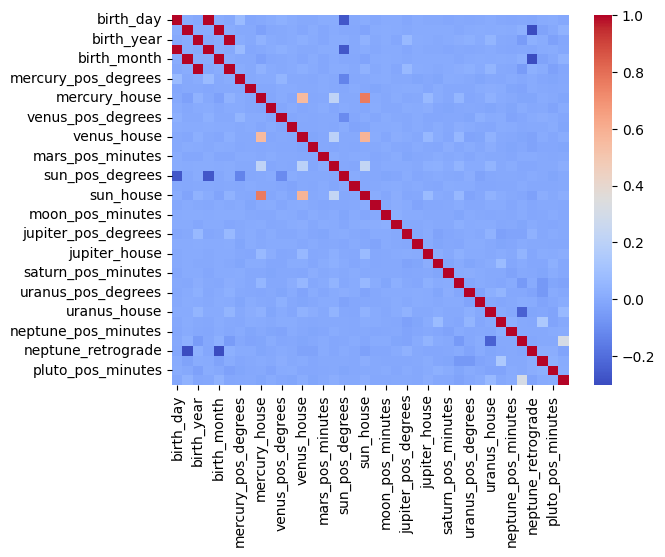

In [184]:
#random

df_small =  df_clean[['birth_day', 'birth_month', 'birth_year', 'birth_time', 
                'sun_sign', 'birth_day', 'birth_month', 'birth_year', 'birth_time',
                'mercury_sign', 'mercury_pos_degrees', 'mercury_pos_minutes',
       'mercury_house', 'mercury_retrograde', 'venus_sign',
       'venus_pos_degrees', 'venus_pos_minutes', 'venus_house', 'mars_sign',
       'mars_pos_degrees', 'mars_pos_minutes', 'mars_house', 'sun_sign',
       'sun_pos_degrees', 'sun_pos_minutes', 'sun_house', 'moon_sign',
       'moon_pos_degrees', 'moon_pos_minutes', 'moon_house', 'jupiter_sign',
       'jupiter_pos_degrees', 'jupiter_pos_minutes', 'jupiter_house',
       'saturn_sign', 'saturn_pos_degrees', 'saturn_pos_minutes',
       'saturn_house', 'uranus_sign', 'uranus_pos_degrees',
       'uranus_pos_minutes', 'uranus_house', 'neptune_sign',
       'neptune_pos_degrees', 'neptune_pos_minutes', 'neptune_house',
       'neptune_retrograde', 'pluto_sign', 'pluto_pos_degrees',
       'pluto_pos_minutes', 'pluto_house', 'house_AC_sign', 'occupation']] 

# Calculate the correlation matrix
corr_matrix = df_small.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

## Occupation, Death Cause... potential y_predict

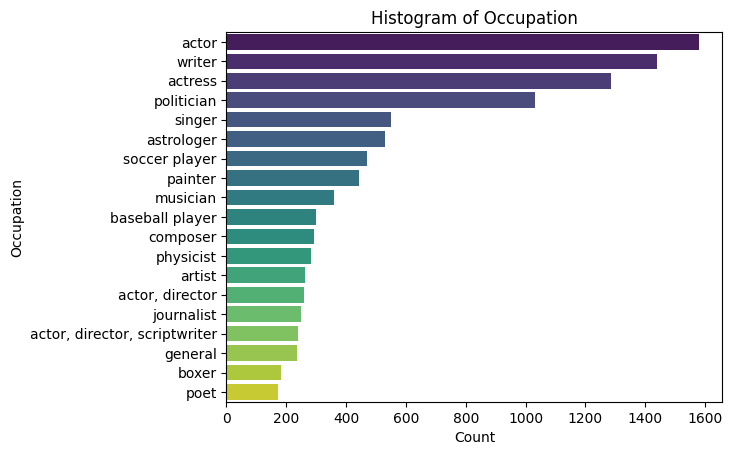

In [185]:
# top 20 occupations
counts = df_clean['occupation'].value_counts().nlargest(20)
counts = counts[counts < 5000] # exclude missing values

# horizontal bar plot
ax = sns.barplot(x=counts.values, y=counts.index, palette='viridis')

# labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Occupation')
ax.set_title('Histogram of Occupation')

plt.show()

In [186]:
df_clean['death_cause'].unique()

array(['', 'Suicide by Poisoning', 'Execution by Beheading', 'Stroke',
       'Execution by Hanging', 'Disease', 'War Casualties',
       'Tuberculosis', 'Victims of Assassination', 'Pneumonia',
       'Syphilis', 'Execution by Gunshot', 'Cancer', 'Unclear cause',
       'Suicide', 'Suicide by Gunshot', 'Fever', 'Heart Failure',
       'Cirrhosis', 'Heart Attack', 'Drowning', 'Injury', 'Murder',
       'Murder by Gunshot', 'Accident', 'Suicide by Hanging',
       'Liver Failure', 'Kidney Failure', "Alzheimer's Disease",
       'Respiratory/Lung Failure', 'Diabetes', 'Influenza', 'Aneurysm',
       'Alcohol', 'Car Accident', 'Brain Failure', 'Leukemia',
       'Execution', 'Aviation Accident', 'Pill Overdose',
       'Casualties of World War I', "Parkinson's disease",
       'Drug Overdose', 'Execution by Electric Chair',
       'Multiple Sclerosis', 'AIDS', 'Asthma', 'Terrorism',
       'Execution by Lethal injection', 'Fall'], dtype=object)

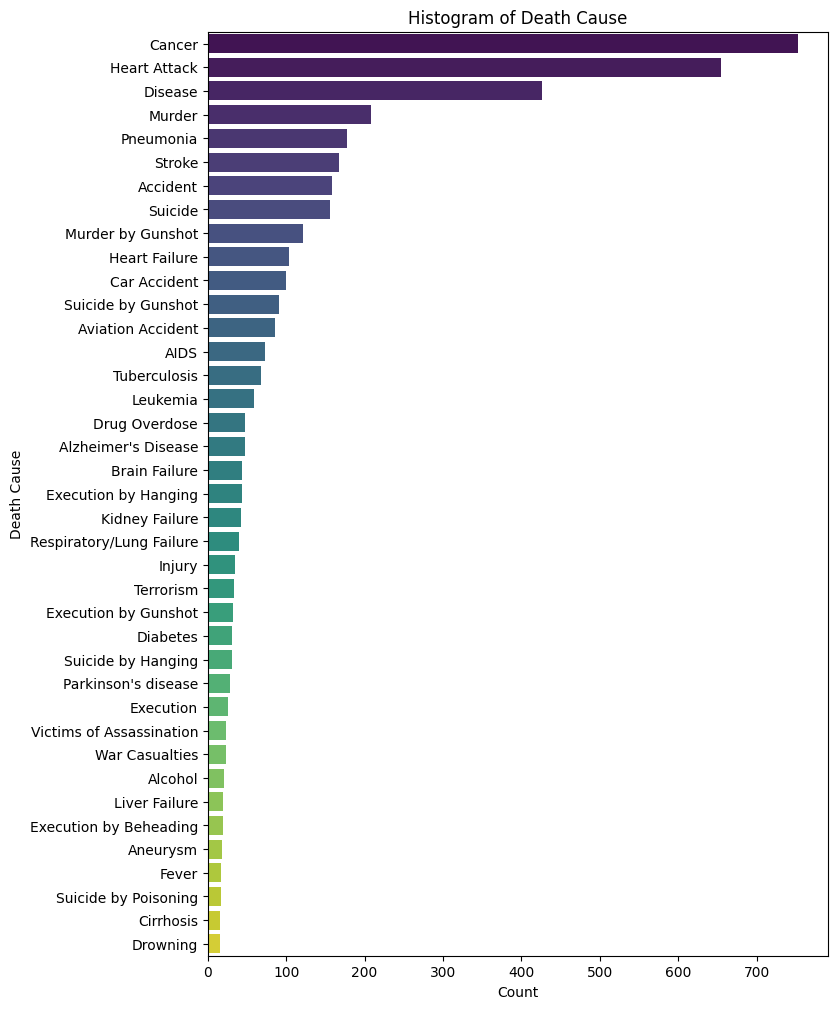

In [187]:
# drop rows where 'death_cause' is NaN
df_dead = df_clean.dropna(subset=['death_cause'])

# cause of death - top 20
counts = df_dead['death_cause'].value_counts().nlargest(40)
counts = counts[counts < 16000] # exclude missing cause

fig, ax = plt.subplots(figsize=(8, 12))

ax = sns.barplot(x=counts.values, y=counts.index, orient='h', palette='viridis')
ax.set_xlabel('Count')
ax.set_ylabel('Death Cause')
ax.set_title('Histogram of Death Cause')

plt.show()